In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Furkan Şarap ML Projesi/Mobil/train.csv")
print(df["price_range"].value_counts())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

##### Veriyi oku ######
df = pd.read_csv("/content/drive/MyDrive/Furkan Şarap ML Projesi/Mobil/train.csv")

##### İlk 5 satır #####
print(df.head())

###### Veri setinin genel yapısı #####
print(df.info())

###### Temel istatistiksel özet #####
print(df.describe())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_


Eksik Değerler:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


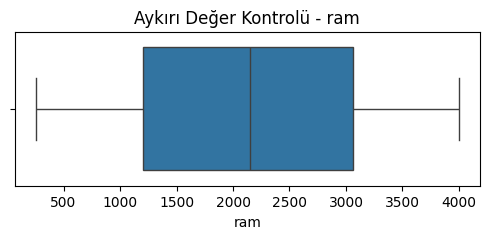

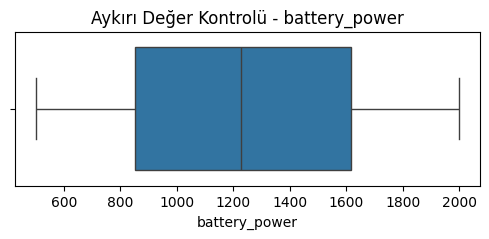

In [3]:
##### Eksik değer kontrolü #####
print("\nEksik Değerler:\n", df.isnull().sum())

##### Aykırı değer kontrolü (örnek olarak 'ram' ve 'battery_power') #####
for col in ['ram', 'battery_power']:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Aykırı Değer Kontrolü - {col}")
    plt.show()


Sınıf Dağılımı (price_range):
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


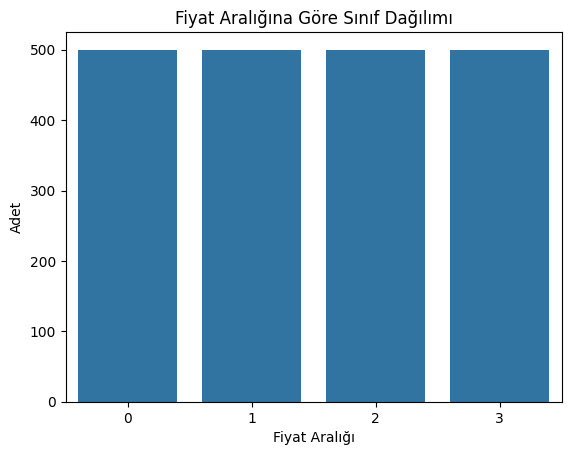

In [4]:
##### Hedef değişkenin sınıf dağılımı #####
print("\nSınıf Dağılımı (price_range):")
print(df['price_range'].value_counts())

##### Grafikle göster #####
sns.countplot(x='price_range', data=df)
plt.title("Fiyat Aralığına Göre Sınıf Dağılımı")
plt.xlabel("Fiyat Aralığı")
plt.ylabel("Adet")
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df.drop("price_range", axis=1)
y = df["price_range"]

##### SelectKBest için MinMaxScaler (chi2 negatif değer sevmez) #####
X_minmax = MinMaxScaler().fit_transform(X)

##### RFE & RandomForest için StandardScaler #####
X_scaled = StandardScaler().fit_transform(X)

In [6]:
from sklearn.feature_selection import SelectKBest, chi2

skb = SelectKBest(score_func=chi2, k=5)
X_skb = skb.fit_transform(X_minmax, y)
skb_features = X.columns[skb.get_support()]
print("📌 SelectKBest ile seçilen özellikler:", list(skb_features))

📌 SelectKBest ile seçilen özellikler: ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)
X_rfe = rfe.fit_transform(X_scaled, y)
rfe_features = X.columns[rfe.get_support()]
print("📌 RFE ile seçilen özellikler:", list(rfe_features))

📌 RFE ile seçilen özellikler: ['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']


In [8]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier()
rf.fit(X_scaled, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[-5:]
X_rf = X_scaled[:, indices]
rf_features = X.columns[indices]
print("📌 RandomForest ile seçilen özellikler:", list(rf_features))

📌 RandomForest ile seçilen özellikler: ['mobile_wt', 'px_height', 'px_width', 'battery_power', 'ram']


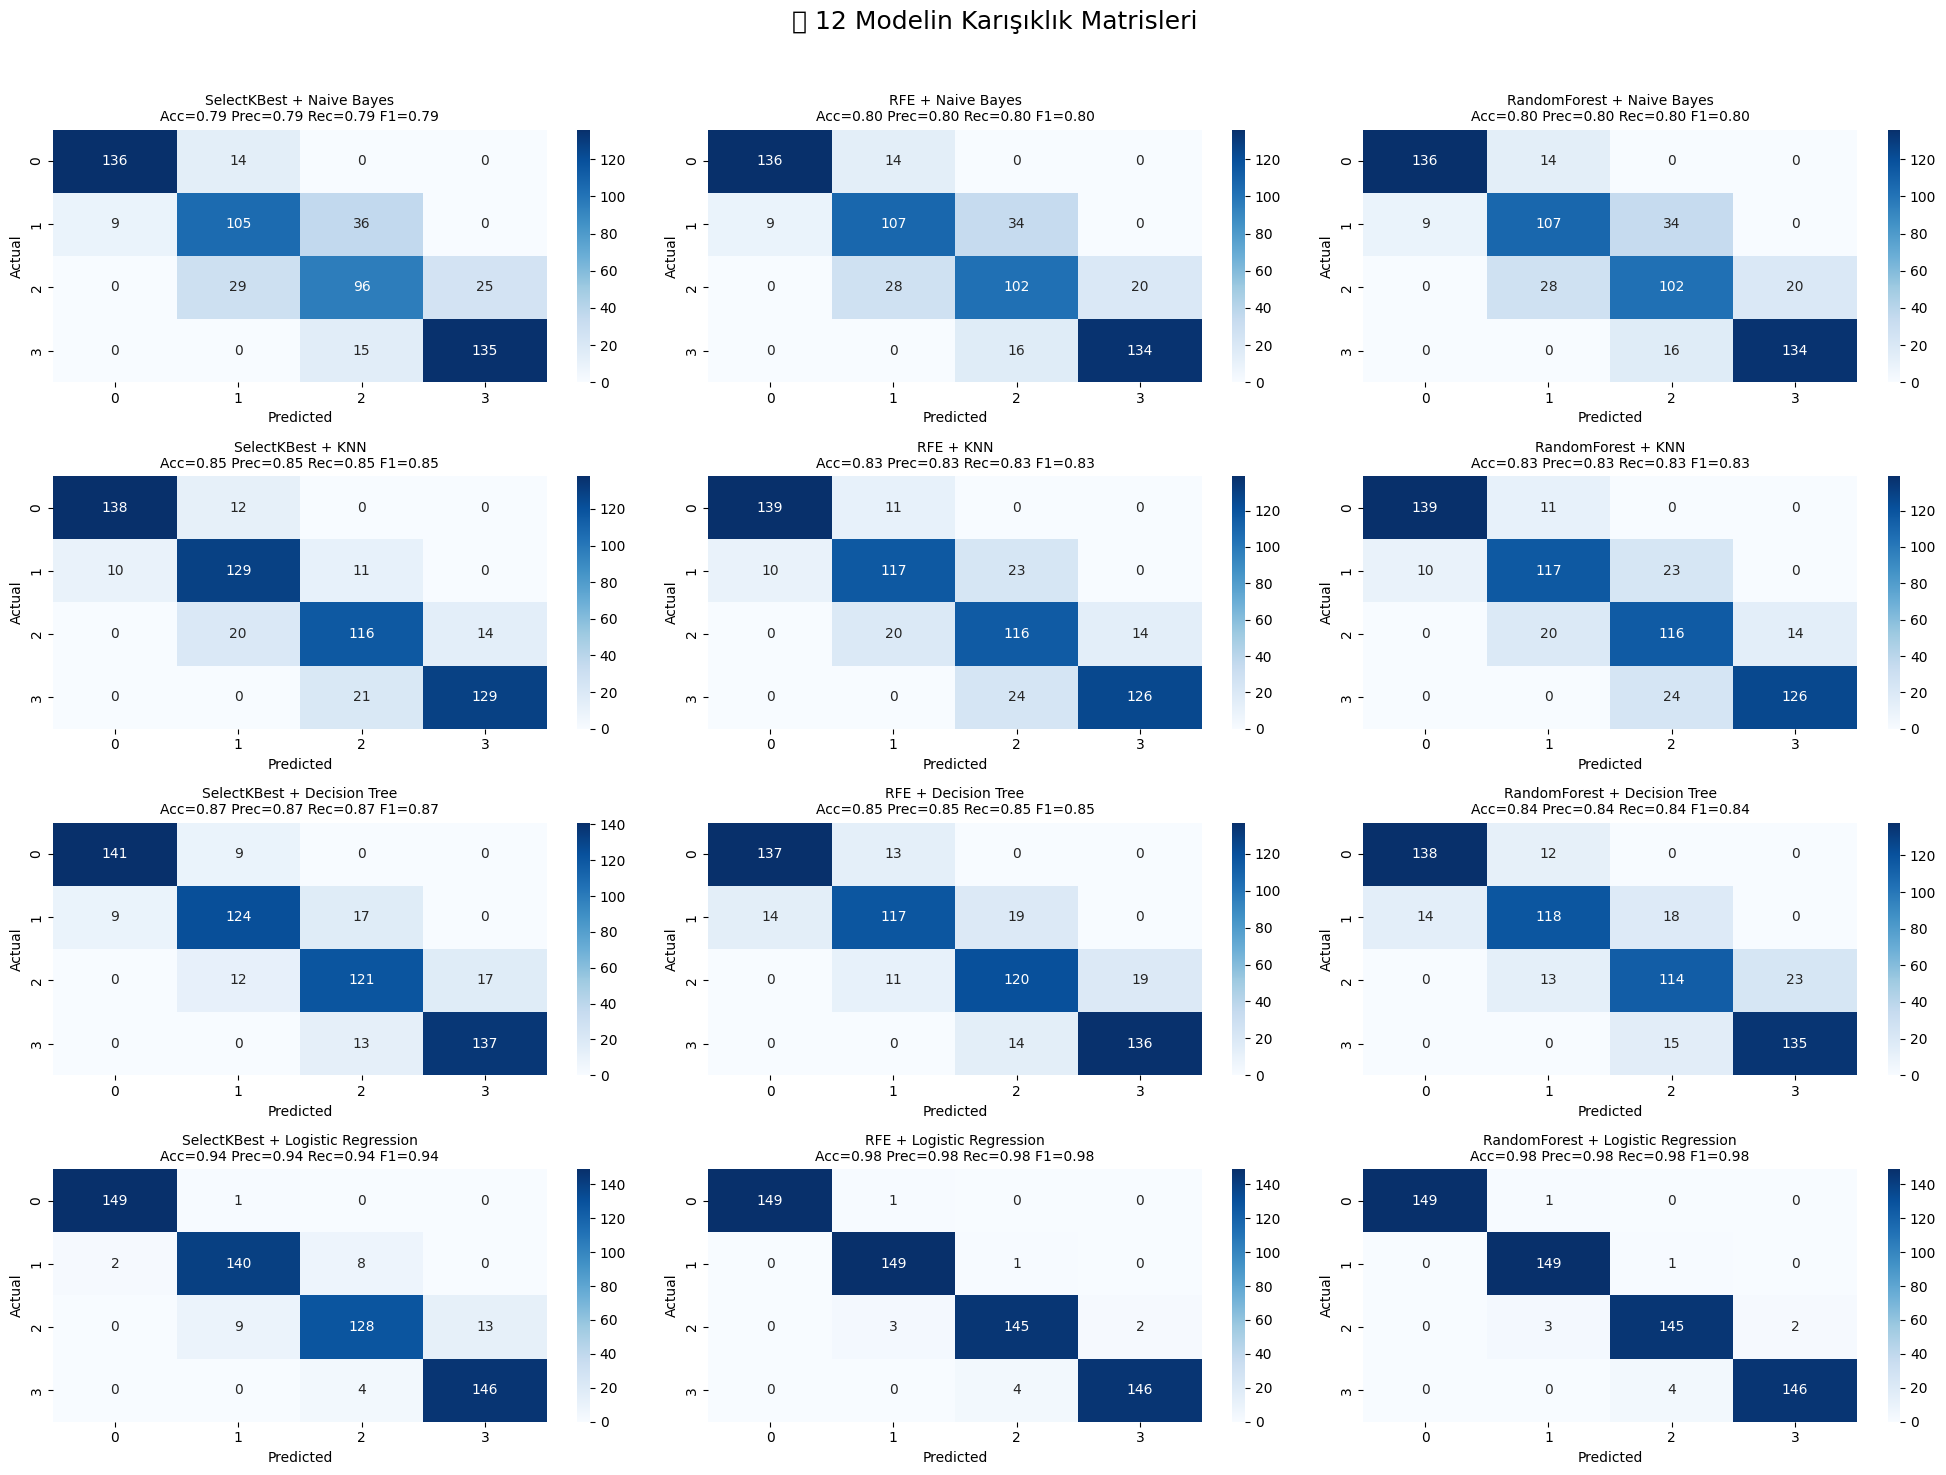


📋 Tüm Model Performansları:

                  Model   Feature Set  Accuracy  Precision    Recall  F1 Score
11  Logistic Regression  RandomForest  0.981667   0.981752  0.981667  0.981672
7   Logistic Regression           RFE  0.981667   0.981752  0.981667  0.981672
3   Logistic Regression   SelectKBest  0.938333   0.938153  0.938333  0.937777
2         Decision Tree   SelectKBest  0.871667   0.871527  0.871667  0.871495
1                   KNN   SelectKBest  0.853333   0.854889  0.853333  0.853707
6         Decision Tree           RFE  0.850000   0.849701  0.850000  0.849576
10        Decision Tree  RandomForest  0.841667   0.840753  0.841667  0.840917
9                   KNN  RandomForest  0.830000   0.833771  0.830000  0.831295
5                   KNN           RFE  0.830000   0.833771  0.830000  0.831295
4           Naive Bayes           RFE  0.798333   0.799309  0.798333  0.798707
8           Naive Bayes  RandomForest  0.798333   0.799309  0.798333  0.798707
0           Naive Baye

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

##### Modeller #####
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

##### Özellik setleri #####
feature_sets = {
    "SelectKBest": (X_skb, skb_features),
    "RFE": (X_rfe, rfe_features),
    "RandomForest": (X_rf, rf_features)
}

results = []

##### Karışıklık matrisleri #####
fig, axes = plt.subplots(len(models), len(feature_sets), figsize=(20, 15))
fig.suptitle("📊 12 Modelin Karışıklık Matrisleri", fontsize=18)

for col_index, (fs_name, (X_fs, fs_cols)) in enumerate(feature_sets.items()):
    X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.3, stratify=y, random_state=42)

    for row_index, (model_name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            "Model": model_name,
            "Feature Set": fs_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1
        })

        ##### Karışıklık matrisi #####
        cm = confusion_matrix(y_test, y_pred)
        ax = axes[row_index, col_index]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

        ##### Başlıkta metrikleri göster #####
        title = f"{fs_name} + {model_name}\nAcc={acc:.2f} Prec={prec:.2f} Rec={rec:.2f} F1={f1:.2f}"
        ax.set_title(title, fontsize=10)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### Metrik tablosu #####
results_df = pd.DataFrame(results)
print("\n📋 Tüm Model Performansları:\n")
print(results_df.sort_values(by="F1 Score", ascending=False))

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle

##### Veri setini yükle #####
df = pd.read_csv("/content/drive/MyDrive/Furkan Şarap ML Projesi/Mobil/train.csv")

##### Hedef değişkeni ayır #####
y = df["price_range"]
X = df.drop("price_range", axis=1)

##### Tüm sayısal giriş verilerine StandardScaler uygula (Z-score normalizasyon) #####
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Özellik seçimi (Recursive Feature Elimination - RFE) #####
model = LogisticRegression(max_iter=1000)
selector = RFE(estimator=model, n_features_to_select=5)
X_selected = selector.fit_transform(X_scaled, y)

##### Seçilen özelliklerin isimlerini sakla #####
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_feature_indices]

##### Seçilen veriyi DataFrame'e çevir #####
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)
X_selected_df["price_range"] = y

##### Veriyi CSV olarak kaydet #####
X_selected_df.to_csv("processed_mobile_data.csv", index=False)

##### Gerekli nesneleri .pkl olarak kaydet #####
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("selector.pkl", "wb") as f:
    pickle.dump(selector, f)

with open("feature_names.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)

print("✅ Veri ön işleme, normalizasyon ve özellik seçimi tamamlandı.")
print("Seçilen 5 özellik:", selected_feature_names)

✅ Veri ön işleme, normalizasyon ve özellik seçimi tamamlandı.
Seçilen 5 özellik: ['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle

##### Adım 1: Veriyi yükle #####
df = pd.read_csv("/content/drive/MyDrive/Furkan Şarap ML Projesi/Mobil/train.csv")
X = df.drop("price_range", axis=1)
y = df["price_range"]

##### Adım 2: StandardScaler ile Z-score normalizasyonu #####
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

##### Adım 3: Özellik seçimi (RFE ile en anlamlı 5 özellik) #####
model = LogisticRegression(max_iter=1000)
selector = RFE(estimator=model, n_features_to_select=5)
X_selected = selector.fit_transform(X_scaled_df, y)
selected_cols = X_scaled_df.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_cols)

##### Adım 4: Sonuçları yazdır #####
print("✅ Veri ön işleme tamamlandı.\n")

print("🔬 Seçilen Özellikler (X_df):")
print(X_selected_df.head())

print("\n🎯 Etiketler (y):")
print(y.head().values)

##### Adım 5: Gereken dosyaları kaydet #####
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("selector.pkl", "wb") as f:
    pickle.dump(selector, f)

with open("feature_names.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)

print("\n📁 scaler.pkl, selector.pkl, feature_names.pkl dosyaları kaydedildi.")

✅ Veri ön işleme tamamlandı.

🔬 Seçilen Özellikler (X_df):
   battery_power  mobile_wt  px_height  px_width       ram
0      -0.902597   1.349249  -1.408949 -1.146784  0.391703
1      -0.495139  -0.120059   0.585778  1.704465  0.467317
2      -1.537686   0.134244   1.392684  1.074968  0.441498
3      -1.419319  -0.261339   1.286750  1.236971  0.594569
4       1.325906   0.021220   1.268718 -0.091452 -0.657666

🎯 Etiketler (y):
[1 2 2 2 1]

📁 scaler.pkl, selector.pkl, feature_names.pkl dosyaları kaydedildi.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle

##### Adım 1: Veriyi yükle #####
df = pd.read_csv("/content/drive/MyDrive/Furkan Şarap ML Projesi/Mobil/train.csv")
X = df.drop("price_range", axis=1)
y = df["price_range"]

##### Adım 2: StandardScaler ile Z-score normalizasyonu #####
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

##### Adım 3: Sonuçları yazdır #####
print("✅ Veri ön işleme tamamlandı.\n")

print("🔬 Normalleştirilmiş Özellikler (X_df):")
print(X_scaled_df.head())

print("\n🎯 Etiketler (y):")
print(y.head().values)

##### Adım 4: Gerekli dosyaları kaydet ######
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("feature_names.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)

print("\n📁 scaler.pkl ve feature_names.pkl dosyaları kaydedildi.")

✅ Veri ön işleme tamamlandı.

🔬 Normalleştirilmiş Özellikler (X_df):
   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.380644  0.340740   1.349249 -1.101971 -1.305750  -1.408949 -1.146784   
1    1.155024  0.687548  -0.120059 -0.664768 -0.645989   0.585778  1.704465   
2    0.493546  1.381165   0.134244  0.209639 -0.645989   1.392684  1.074968   
3   -1.215274  1.034357  -0.261339  0.646842 -0.151168   1.286750  1.236971   
4    0.658915  0.340740   0.021220 -1.101971  0.673534   1.268718 -0.091452   

        ram      

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df.drop("price_range", axis=1)
y = df["price_range"]

##### SelectKBest için MinMaxScaler (chi2 negatif değer sevmez) ######
X_minmax = MinMaxScaler().fit_transform(X)

##### RFE & RandomForest için StandardScaler #####
X_scaled = StandardScaler().fit_transform(X)
from sklearn.feature_selection import SelectKBest, chi2

skb = SelectKBest(score_func=chi2, k=5)
X_skb = skb.fit_transform(X_minmax, y)
skb_features = X.columns[skb.get_support()]
print("📌 SelectKBest ile seçilen özellikler:", list(skb_features))

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)
X_rfe = rfe.fit_transform(X_scaled, y)
rfe_features = X.columns[rfe.get_support()]
print("📌 RFE ile seçilen özellikler:", list(rfe_features))

from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier()
rf.fit(X_scaled, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[-5:]
X_rf = X_scaled[:, indices]
rf_features = X.columns[indices]
print("📌 RandomForest ile seçilen özellikler:", list(rf_features))

📌 SelectKBest ile seçilen özellikler: ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']
📌 RFE ile seçilen özellikler: ['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']
📌 RandomForest ile seçilen özellikler: ['mobile_wt', 'px_height', 'px_width', 'battery_power', 'ram']
